In [2]:
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spy = fdr.DataReader('SPY', start='2014-01-01', end='2024-01-01')

close_pct_change = spy['Close'].pct_change().to_numpy()
open_pct_change = spy['Open'].pct_change().to_numpy()

2517

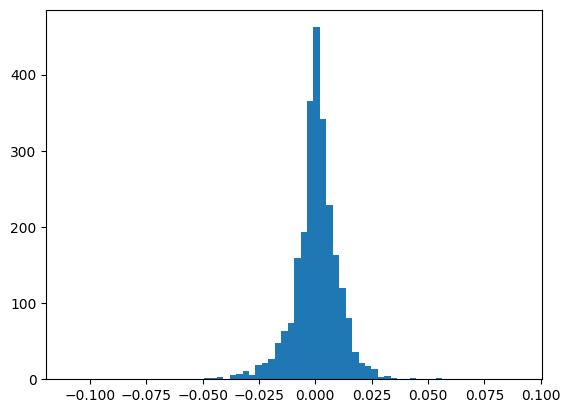

In [17]:
plt.hist(close_pct_change, bins=70);
len(close_pct_change)

In [4]:
data = close_pct_change[close_pct_change>0]
data = np.log(np.sort(data)[::-1])

n = len(data)
alpha = 1 / (sum(data[0:n-1])/(n-1) - data[n-1])
print(alpha)


0.20315320915932913


In [5]:
k = n - 1
alpha = 1 / (np.cumsum(data[:k]) / np.arange(1, k + 1) - data[1:k + 1])
print(alpha)


[17.20162295  3.70023875  3.12307095 ...  0.20916963  0.2049804
  0.20315321]


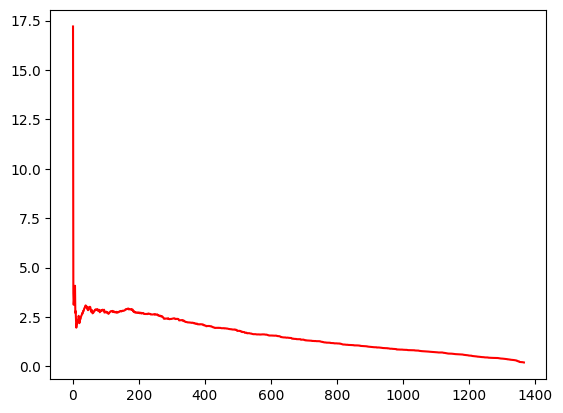

In [6]:
plt.plot(np.arange(1, n), alpha, 'red')

(0.0, 5.0)

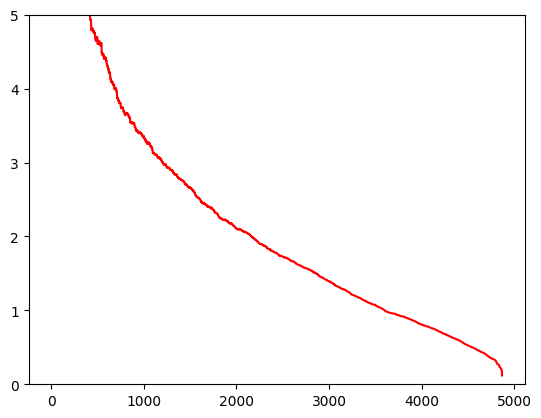

In [7]:
data_norm = np.random.normal(0, 1, 10000)
data_norm = data_norm[data_norm>0]
data_norm = np.log(np.sort(data_norm)[::-1])

n = len(data_norm)
k = n - 1
alpha = 1 / (np.cumsum(data_norm[:k]) / np.arange(1, k + 1) - data_norm[1:k + 1])

plt.plot(np.arange(1, n), alpha, 'red')
plt.ylim(0, 5)

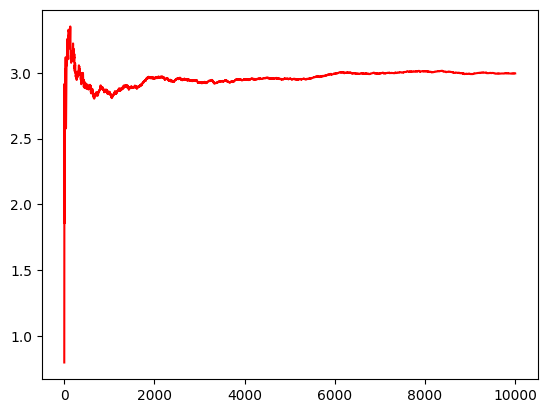

In [8]:
data_pareto = np.random.pareto(a=3, size=10000) + 1
data_pareto = np.log(np.sort(data_pareto)[::-1])

n = len(data_pareto)
k = n - 1
alpha = 1 / (np.cumsum(data_pareto[:k]) / np.arange(1, k + 1) - data_pareto[1:k + 1])

plt.plot(np.arange(1, n), alpha, 'red')

/tmp/ipykernel_3144934/2909761433.py:2: RuntimeWarning: invalid value encountered in log
  data_t = np.log(np.sort(data_t)[::-1])


(0.0, 15.0)

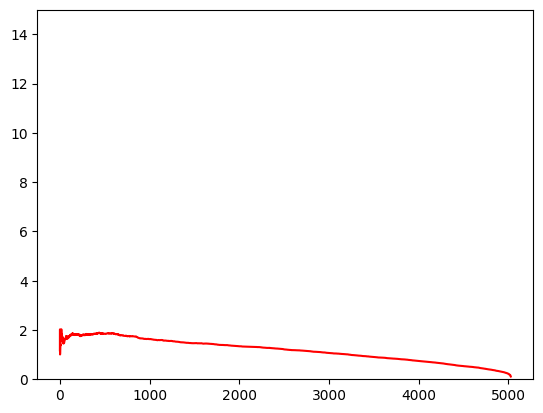

In [13]:
data_t = np.random.standard_t(df = 2, size=10000)
data_t = np.log(np.sort(data_t)[::-1])

n = len(data_t)
k = n - 1
alpha = 1 / (np.cumsum(data_t[:k]) / np.arange(1, k + 1) - data_t[1:k + 1])

plt.plot(np.arange(1, n), alpha, 'red')
plt.ylim(0, 15)

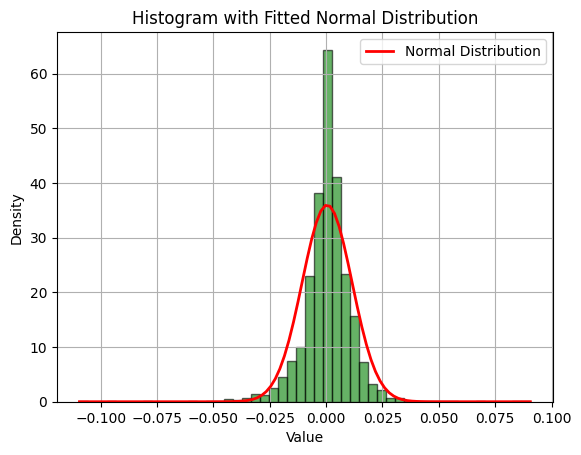

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import norm

m = np.nanmean(close_pct_change)
v = np.nanvar(close_pct_change)

x = np.linspace(np.nanmin(close_pct_change), np.nanmax(close_pct_change), 100)
pdf = norm.pdf(x, loc=m, scale=np.sqrt(v))

plt.hist(close_pct_change[~np.isnan(close_pct_change)], bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, pdf, color='red', lw=2, label="Normal Distribution")
plt.title("Histogram with Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()